In [0]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
import random



In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [33]:
link = 'https://drive.google.com/open?id=1uQKDwP6OI-gGGu_s7J8zo8zyOoImzEEa'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1uQKDwP6OI-gGGu_s7J8zo8zyOoImzEEa


In [37]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df = pd.read_csv('Filename.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head()
# Dataset is now stored in a Pandas Dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,62989.0,-3.004111,-2.181492,1.245721,-2.995346,-0.742657,-1.719837,0.030631,0.570375,2.066912,-2.873141,-1.053554,0.110220,-1.520418,0.335809,0.718468,-0.084426,-0.337126,0.757427,-0.611400,0.839346,0.487897,0.385978,0.222047,0.366799,0.954124,-0.885307,0.133746,-0.191613,285.54,0
1,67698.0,-0.874225,0.925399,1.690622,1.333660,1.082540,-0.276047,0.661013,0.092712,-1.629434,0.220514,0.660649,0.434644,0.409210,0.259696,-0.861283,0.991977,-1.233623,0.501306,-1.142804,-0.011960,0.276988,0.595321,-0.307900,0.027339,0.253701,-0.006557,0.047201,0.105799,3.80,0
2,147485.0,-1.591705,-0.756838,-0.128785,1.512883,3.137825,-0.837095,-0.502464,0.184370,-0.628946,-0.879718,0.260570,-0.001402,0.232498,-1.718248,0.650499,-0.574362,1.920908,1.878347,3.586614,0.957002,-0.010881,-0.368146,-0.250779,-1.519167,0.861570,0.343089,0.043316,0.136746,30.00,0
3,73711.0,-0.842670,1.401843,0.927235,1.070402,0.843883,0.467333,0.366716,0.616739,-1.586963,0.000041,-0.409240,0.139799,0.319222,0.538952,-0.760940,1.572230,-1.475274,0.748143,-0.725295,-0.208826,0.036573,-0.182581,-0.226834,-1.029794,-0.118762,-0.228960,-0.024250,0.046547,1.00,0
4,55013.0,1.240524,0.198105,0.396619,0.426003,-0.250803,-0.475057,-0.040423,-0.043496,-0.208514,0.100318,1.203992,1.006626,0.398654,0.394099,0.343683,0.591116,-0.800990,0.048141,0.295203,-0.063978,-0.226240,-0.684318,0.081417,-0.004547,0.235403,0.097383,-0.032628,0.005736,1.98,0


In [38]:
fraud = df.loc[df['Class'] == 1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


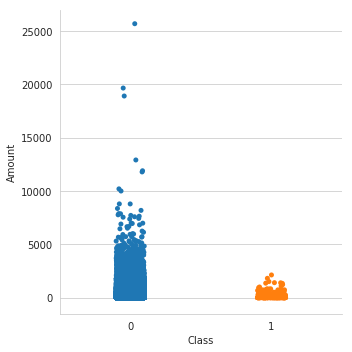

In [46]:
sns.set_style("whitegrid")
example = sns.catplot(x='Class', y='Amount', hue='Class', data=df)
plt.show()


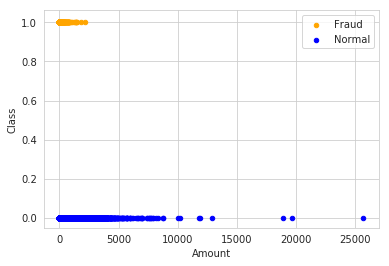

In [40]:

ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Normal', ax=ax)
plt.show()

In [0]:
 from sklearn import linear_model
 from sklearn.model_selection import train_test_split

In [0]:
x = df.iloc[:, :-1]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [0]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print('Score:', logistic.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Score: 0.9989265973134838


In [0]:
y_predicted = np.array(logistic.predict(X_test))
print(y_predicted)

[0 0 0 ... 0 0 0]
